# Basic stats of Cluster distributions

In [2]:
datafile = '../data/cluster_dist_s2_w.csv' # with AU6_AU12 clusters

#-----------------

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.3f}'.format
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
# import in scripts dir
import sys
sys.path.append('../scripts')
import compare 

print('...loading data')
df = pd.read_csv(datafile, skipinitialspace=True) 
print('df.shape:', df.shape)
print('\ncolumns: ')
for c in df.columns:
    print(c,end=',')

...loading data
df.shape: (146, 7)

columns: 
Filename,y,duchenne,neutral,strong duchenne,6 only,polite,

duchenne


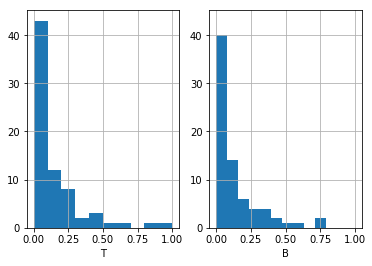

neutral


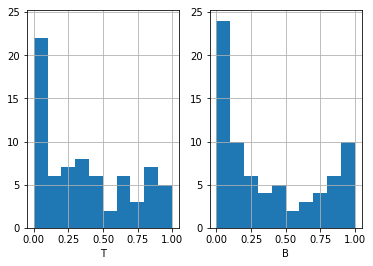

strong duchenne


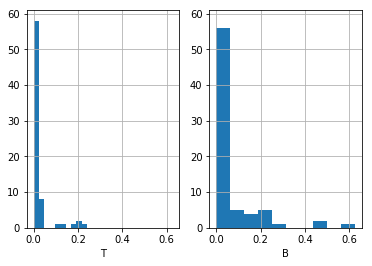

6 only


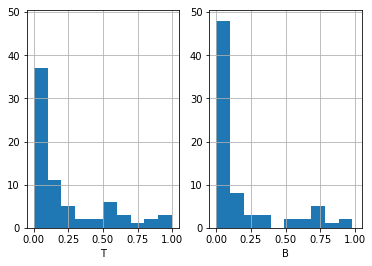

polite


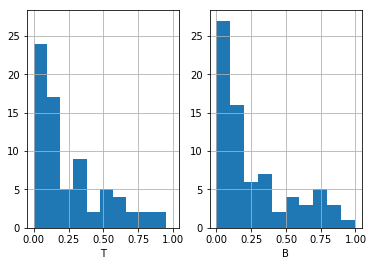

In [3]:
clusters = ['duchenne','neutral','strong duchenne','6 only','polite']
for cluster in clusters:
    print(cluster)
    fig = plt.figure()
    #ax1 = fig.add_subplot(1, 2, 1)
    #ax2 = fig.add_subplot(1, 2, 2, sharex=ax1, sharey=ax1)
    ax1 = plt.subplot(1,2,1)
    plt.xlabel('T')
    df[df['y']][cluster].hist(bins=10)
    plt.subplot(1,2,2, sharex=ax1, sharey=ax1)
    plt.xlabel('B')
    df[~df['y']][cluster].hist(bins=10)
    plt.show()

### cluster diversity (variance in cluser distribution)

In [4]:
df['var'] = df[clusters].var(axis=1)
g = df.groupby('y')
g['var'].mean()

y
False   0.091
True    0.088
Name: var, dtype: float64

In [9]:
n = df[df['neutral'] > .90].groupby('y').size()
sd = df[df['strong duchenne'] > .10].groupby('y').size()
r = pd.DataFrame([n,sd]).T
r.columns = ['neutral > .90', 'strong duchenne > .10']
display(r)


,neutral > .90,strong duchenne > .10
y,,
False,10,15
True,5,6


## Classification using cluster distributions

Results of running KNN, logsitic regression, and tree classifiers when using only cluster distributions as features.

dev set used for hyperparameter selection

It seems the tree classifier tends to consistently perform best around 60%. It is interesting that the ideal number of leaf nodes is usually around 3. (Does this mean only two partitions boundaries of the space are being used? What are they?)

In [6]:
import ml_core

datafile = 'cluster_dist_s2_w.csv'    
df = pd.read_csv(datafile, skipinitialspace=True) 

cluster_name2i = {'duchenne':0,'neutral':1,'strong duchenne':2,'6 only':3,'polite':4}
cluster_names = list(cluster_name2i.keys())
print('df.shape:',df.shape)
for c in df.columns:
    print(c,end=',')
usecols = ['y'] + cluster_names
ml_core.ml(df[usecols])

end
df.shape: (146, 7)
Filename,y,duchenne,neutral,strong duchenne,6 only,polite,
MODEL:  KNN
fold: 0  best c: 35  dev:0.56  dev_ones:0.56 test:0.44  train:0.54
fold: 1  best c: 50  dev:0.62  dev_ones:0.50 test:0.38  train:0.55
fold: 2  best c: 25  dev:0.53  dev_ones:0.44 test:0.60  train:0.54
fold: 3  best c: 50  dev:0.69  dev_ones:0.50 test:0.60  train:0.57
fold: 4  best c: 50  dev:0.61  dev_ones:0.52 test:0.57  train:0.56
fold: 5  best c: 50  dev:0.64  dev_ones:0.48 test:0.50  train:0.53
fold: 6  best c: 50  dev:0.58  dev_ones:0.45 test:0.50  train:0.54
fold: 7  best c: 50  dev:0.64  dev_ones:0.45 test:0.29  train:0.56
fold: 8  best c: 50  dev:0.64  dev_ones:0.45 test:0.86  train:0.54
fold: 9  best c: 18  dev:0.67  dev_ones:0.48 test:0.50  train:0.61
Avg test acc:0.523 Avg train acc:0.554

MODEL:  LOGISTIC
fold: 0  best c: 3  dev:0.78  dev_ones:0.56 test:0.38  train:0.68
fold: 1  best c: 3  dev:0.62  dev_ones:0.50 test:0.81  train:0.62
fold: 2  best c: 1  dev:0.75  dev_ones:0.53 tes

### scatter plot of two cluster distributions

Note that high concentration "on the axes". This is perhaps a reason why tree classifier, with its rectangular regions, does a pretty good and robust job at classification.

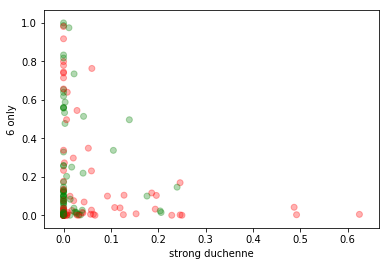

In [7]:
ml_core.plot('strong duchenne','6 only',df)


### display full distribution table

Note the large number of zeros for many cluster types for many files.

In [30]:
display(df[list(set(df.columns) - {'Filename'})])

,y,6 only,neutral,polite,strong duchenne,duchenne
0,True,0.833,0.000,0.000,0.000,0.167
1,False,0.640,0.000,0.000,0.008,0.353
2,True,0.128,0.074,0.700,0.000,0.097
3,True,0.014,0.986,0.000,0.000,0.000
4,True,0.337,0.041,0.108,0.105,0.409
5,True,0.619,0.314,0.000,0.000,0.068
6,False,0.000,0.369,0.554,0.007,0.070
7,False,0.779,0.195,0.026,0.000,0.000
8,False,0.000,0.970,0.030,0.000,0.000
9,True,0.639,0.341,0.020,0.000,0.000
